In [77]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt 

In [78]:
fileptr_1D_old = uproot.open("/depot/cms/top/bakshi3/TopSpinCorr_Run2_alt_version/CMSSW_10_6_29/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/combined/c_kk.root")
fileptr_1D_new = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/combined/c_kk.root")

In [79]:
[k for k in fileptr_1D_new.keys() if 'mat' in k]

['c_kkEmatrix_rebinnedA;1',
 'c_kkEmatrix_rebinnedB;1',
 'c_kkCorrmatrix;1',
 'c_kkCorrmatrix_rebinnedA;1',
 'c_kkCorrmatrix_rebinnedB;1',
 'c_kkEmatrixCor_rebinnedA;1',
 'c_kkEmatrixCor_rebinnedB;1',
 'c_kkEmatrixNorm_rebinnedA;1',
 'c_kkEmatrixNorm_rebinnedB;1']

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f411053bca0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f411057dfc0>, text=[])

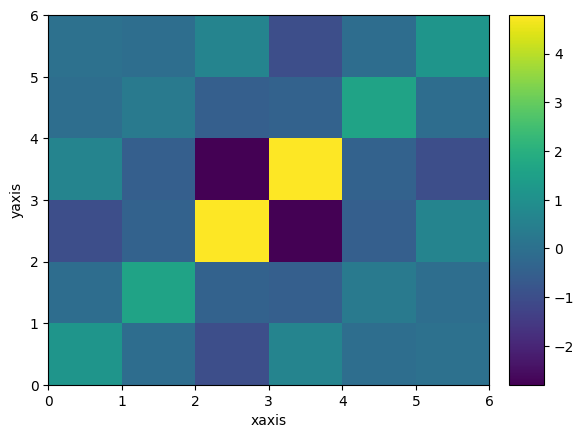

In [80]:
fileptr_1D_old['c_kkEmatrixCor_rebinnedA'].to_hist().plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f41104404f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f4110ab3b80>, text=[])

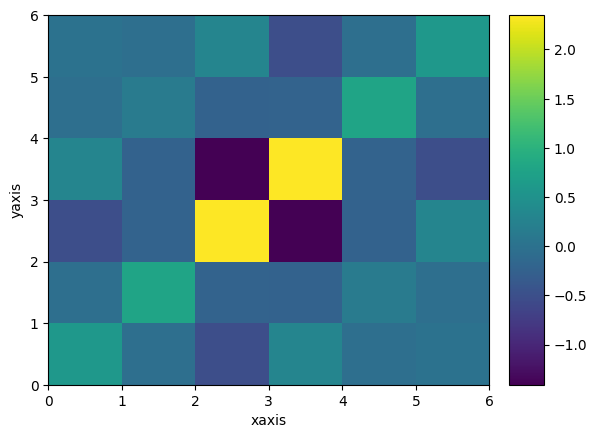

In [81]:
fileptr_1D_new['c_kkEmatrixCor_rebinnedA'].to_hist().plot()

In [82]:
fileptr_1D_old["c_kkEmatrixCor_rebinnedB"].to_numpy()[0][0]

array([ 1.08878712,  0.13388789, -1.52670125,  0.93817957, -0.01842789,
       -0.08241072])

In [83]:
fileptr_1D_new["c_kkEmatrixCor_rebinnedB"].to_numpy()[0][0]

array([ 0.56297686,  0.07107862, -0.76814886,  0.47965667, -0.01549976,
       -0.04207184])

In [84]:
n_error = []
o_error = []
ratio   = []

for i in range(6) :
    new_FW_error = np.sqrt(fileptr_1D_new["c_kkEmatrixCor_rebinnedB"].to_numpy()[0][i][i])
    exi_FW_error = np.sqrt(fileptr_1D_old["c_kkEmatrixCor_rebinnedB"].to_numpy()[0][i][i])
    n_error.append(new_FW_error)
    o_error.append(exi_FW_error)
    ratio.append(np.round(new_FW_error/exi_FW_error,3))

ratio

[0.719, 0.711, 0.705, 0.704, 0.711, 0.719]

In [85]:
n_error = np.array(n_error)

In [86]:
o_error = np.array(o_error)

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f41123b73d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

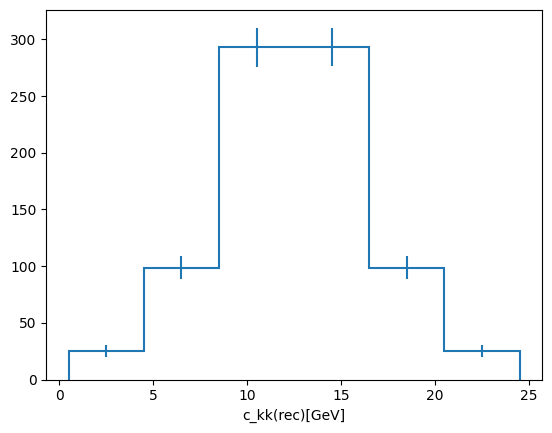

In [87]:
fileptr_1D_new['c_kkTUnfResultCor_rebinnedA'].to_hist().plot()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f410f9e8460>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

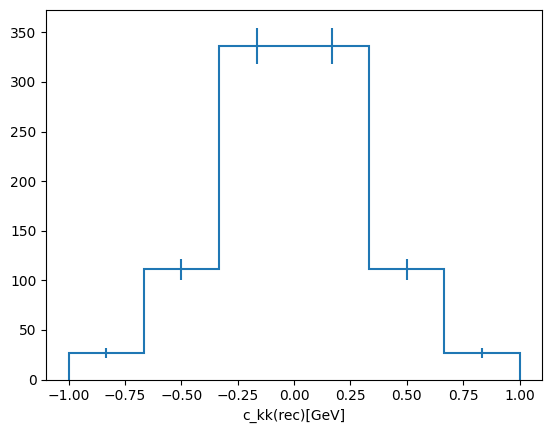

In [89]:
fileptr_1D_old['c_kkTUnfResultCor_rebinnedA'].to_hist().plot()

In [90]:
new_fw_unfolded_result = fileptr_1D_new['c_kkTUnfResultCor_rebinnedA'].to_numpy()[0]

In [91]:
exi_fw_unfolded_result = fileptr_1D_old['c_kkTUnfResultCor_rebinnedA'].to_numpy()[0]

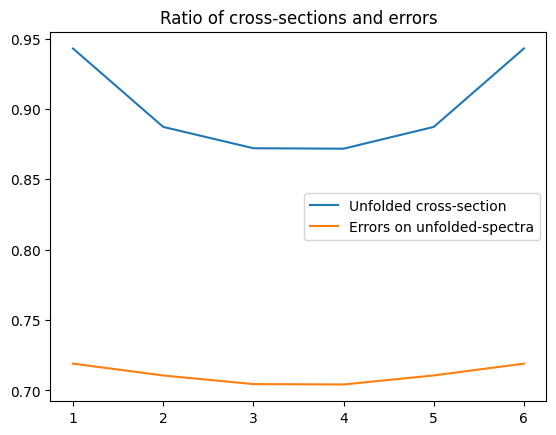

In [92]:
plt.title("Ratio of cross-sections and errors")
plt.plot(np.linspace(1,6,6), np.divide(new_fw_unfolded_result, exi_fw_unfolded_result), label='Unfolded cross-section')
plt.plot(np.linspace(1,6,6), np.divide(n_error, o_error), label='Errors on unfolded-spectra')
plt.legend()

In [93]:
exi_fw_unfolded_result

array([ 26.83884231, 111.2971866 , 336.17216044, 336.44883027,
       111.29825189,  26.83820863])

In [94]:
new_fw_unfolded_result

array([ 25.30614319,  98.74392958, 293.160103  , 293.29457183,
        98.7438221 ,  25.30616026])